## scikit-learn
: 회귀, 분류, 차원 축소, 클러스터링 등 머신 러닝 관련 알고리즘의 종합적인 집합.

## 1. 모듈 임포트

In [ ]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. 회귀

In [ ]:
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10)
# 50개의 표본, 50개의 특징, 그 중 10개의 특징 = 정보성을 가진 데이터 생성

In [ ]:
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X_all, y_all, train_size=0.5)
# 훈련집합과 테스트 집합으로 분할 

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
def sse(resid):
  return np.sum(resid**2)
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

3.2827720818739603e-24

In [ ]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

522134.75954640826

In [ ]:
model.score(X_train, y_train)

1.0

In [ ]:
model.score(X_test, y_test)

0.34393043819347513

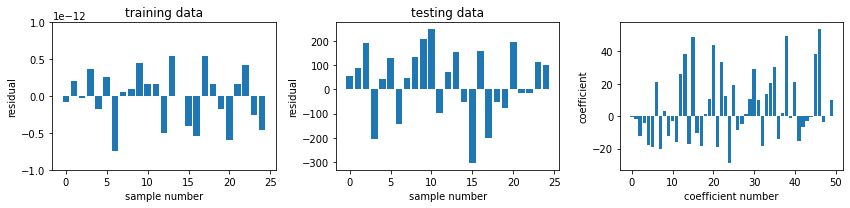

In [ ]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
  fig, axes = plt.subplots(1, 3, figsize=(12, 3))
  axes[0].bar(np.arange(len(resid_train)), resid_train)
  axes[0].set_xlabel("sample number")
  axes[0].set_ylabel("residual")
  axes[0].set_title("training data")
  axes[1].bar(np.arange(len(resid_test)), resid_test)
  axes[1].set_xlabel("sample number")
  axes[1].set_ylabel("residual")
  axes[1].set_title("testing data")
  axes[2].bar(np.arange(len(coeff)), coeff)
  axes[2].set_xlabel("coefficient number")
  axes[2].set_ylabel("coefficient")
  fig.tight_layout()
  return fig, axes
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [ ]:
model = linear_model.Ridge(alpha=2.5)

In [ ]:
model.fit(X_train, y_train)

Ridge(alpha=2.5)

In [ ]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

4889.027459116589

In [ ]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

478351.4822431648

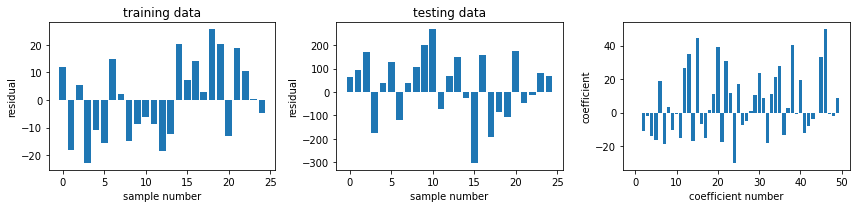

In [ ]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [ ]:
model = linear_model.Lasso(alpha=1.0)
model.fit(X_train, y_train)

Lasso()

In [ ]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

652.9330126190141

In [ ]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

61132.64777218399

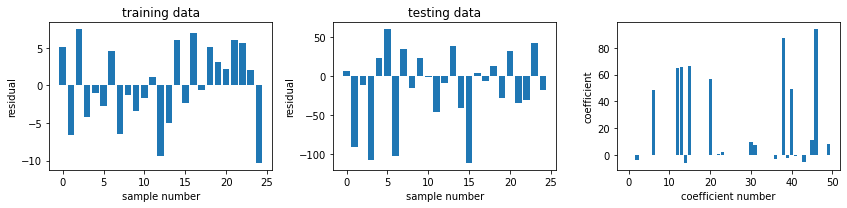

In [ ]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [ ]:
alphas = np.logspace(-4, 2, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

In [ ]:
for n, alpha in enumerate(alphas):
  model = linear_model.Lasso(alpha=alpha)
  model.fit(X_train, y_train)
  coeffs[n, :] = model.coef_
  sse_train[n] = sse(y_train - model.predict(X_train))
  sse_test[n] = sse(y_test - model.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.416e+01, tolerance: 8.526e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.056e+02, tolerance: 8.526e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Text(0, 0.5, 'sse')

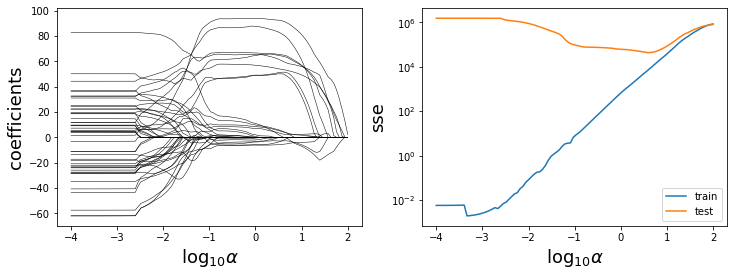

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
for n in range(coeffs.shape[1]):
  axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)

In [ ]:
model = linear_model.LassoCV()
model.fit(X_all, y_all)

LassoCV()

In [ ]:
model.alpha_

0.08258950382046985

In [ ]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

2.653190130649208

In [ ]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

2.748347033437351

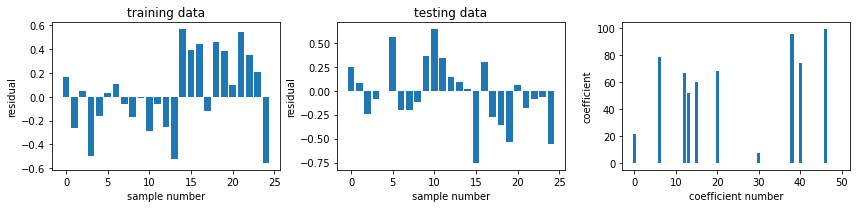

In [ ]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [ ]:
model = linear_model.ElasticNetCV()
model.fit(X_train, y_train)

ElasticNetCV()

In [ ]:
model.alpha_

0.2055475647300071

In [ ]:
model.l1_ratio

0.5

In [ ]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

5479.162464778504

In [ ]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

465669.1650880823

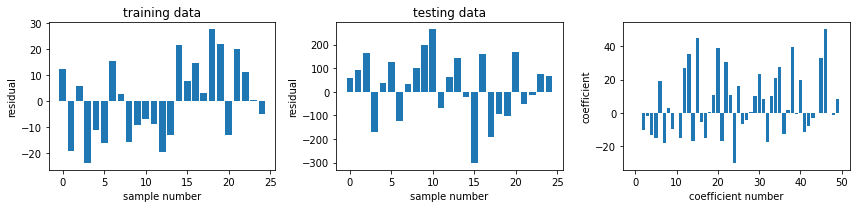

In [ ]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

## 3. 분류

In [ ]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
iris.target.shape

(150,)

In [ ]:
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(iris.data, iris.target, train_size=0.7)

In [ ]:
classifier = linear_model.LogisticRegression()

In [ ]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_test_pred = classifier.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      0.94      0.91        16
           2       0.94      0.89      0.91        18

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [ ]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 15,  1],
       [ 0,  2, 16]])

In [ ]:
np.bincount(y_test)

array([11, 16, 18])

In [ ]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 15,  1],
       [ 0,  3, 15]])

In [ ]:
train_size_vec = np.linspace(0.1, 0.9, 30)

In [ ]:
classifiers = [tree.DecisionTreeClassifier,
              neighbors.KNeighborsClassifier,
              svm.SVC,
              ensemble.RandomForestClassifier]

In [ ]:
cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)), dtype=float)

In [ ]:
for n, train_size in enumerate(train_size_vec):
  X_train, X_test, y_train, y_test = \
  model_selection.train_test_split(iris.data, iris.target, train_size=train_size)
  
  for m, Classifier in enumerate(classifiers):
    classifier = Classifier()
    classifier.fit(X_train, y_train)
    y_test_p = classifier.predict(X_test)
    cm_diags[:, n, m] = metrics.confusion_matrix(y_test, y_test_p).diagonal()
    cm_diags[:, n, m] /= np.bincount(y_test)

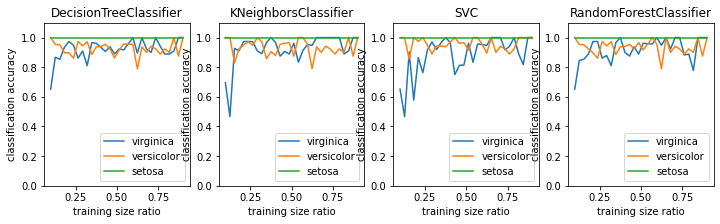

In [ ]:
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))
for m, Classifier in enumerate(classifiers):
  axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
  axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
  axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
  axes[m].set_title(type(Classifier()).__name__)
  axes[m].set_ylim(0, 1.1)
  axes[m].set_ylabel("classification accuracy")
  axes[m].set_xlabel("training size ratio")
  axes[m].legend(loc=4)

## 4. 클러스터링

In [ ]:
X, y = iris.data, iris.target

In [ ]:
n_clusters = 3
clustering = cluster.KMeans(n_clusters=n_clusters)

In [ ]:
clustering.fit(X)

KMeans(n_clusters=3)

In [ ]:
y_pred = clustering.predict(X)

In [ ]:
y_pred[::8]

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
y[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [ ]:
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1
y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

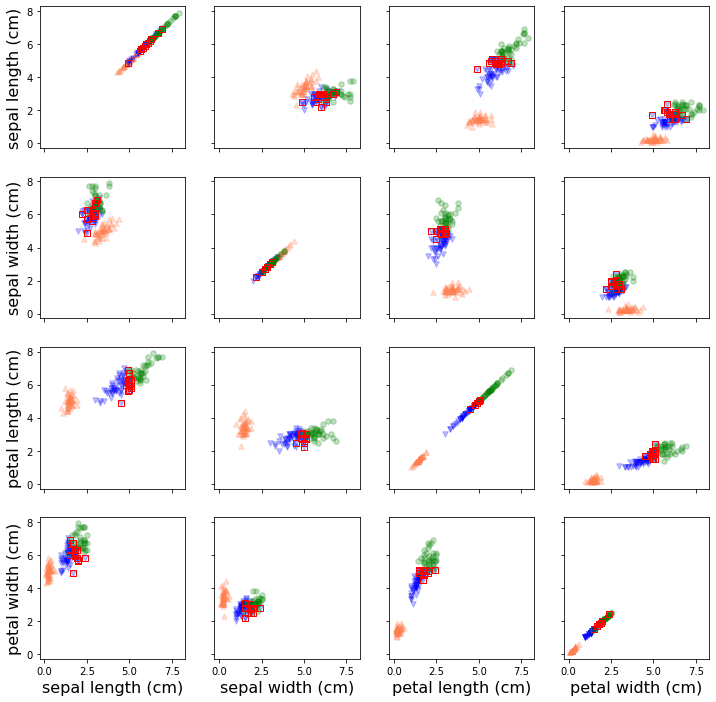

In [ ]:
N = X.shape[1]
fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)
colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
  for n in range(N):
    for p in range(n_clusters):
      mask = y_pred == p
      axes[m, n].scatter(X[:, m][mask], X[:, n][mask], s=30, marker=markers[p], color=colors[p], alpha=0.25)
    for idx in np.where(y != y_pred):
      axes[m, n].scatter(X[idx, m], X[idx, n], s=30, marker="s", edgecolor="red", facecolor=(1,1,1,0))
  axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
  axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)